In [1]:
import numpy as np
import pandas as pd

In [2]:
rho_tank=4500 #kg/m3
m=4/86400#kg/s
P=410#bar
T=273.15+25
T1=T
Tref=10+273.15
Po=31

In [3]:
import pandas as pd
crit=pd.DataFrame()
crit['Comp']=['H2']
crit['Tc']=[32.938]
crit['Pc']=[1293.00]
crit['w']=[-0.2160]
crit['PM']=[1.00784*2]
T=298
#P1=100
def PRv2(Tc,Pc,mm,w,T,P):
    #Unidades: P, Pc: kPa, T, Tc: K, w: Adim, mm: kg/kmol
    R=8.314#J/mol-K
    Ru=R/mm
    mi=0.379642+1.48503*w-0.164423*w**2+0.016666*w**3
    alpha=(1+mi*(1-(T/Tc)**0.5))**2
    a=0.45724*((Ru)**2)*(Tc**2)*alpha/(Pc)
    b=0.0778*(Ru)*(Tc/Pc)
    A_may=a*P/(((Ru)**2)*(T**2))
    B_may=b*P/((Ru)*T)
    m=-(1-B_may)
    n=(A_may-(3*B_may**2)-(2*B_may))
    o=-((A_may*B_may)-(B_may**2)-(B_may**3))
    v=(Ru*T)/P
    return {'alpha':alpha,'a':a,'b':b,'A':A_may,'B':B_may,'m':m,'n':n,'o':o,'v':v}
resul_peng=PRv2(crit['Tc'][0],crit['Pc'][0],crit['PM'][0],crit['w'][0],316+273.15,172.37*100)
z=np.real(max(np.roots([1,resul_peng['m'],resul_peng['n'],resul_peng['o']])))
#r1=(P1*crit['PM'][0])/(z*(8.314)*(T+273.15))
#V1=m/r1
#V1

In [4]:
import numpy as np
from scipy.optimize import root
def trabajo_reversible(m, P1, P2, eta, T2,T1):
    P1=P1*100
    P2=P2*100
    
    resul_peng=PRv2(crit['Tc'][0],crit['Pc'][0],crit['PM'][0],crit['w'][0],T1,P1)
    z=np.real(max(np.roots([1,resul_peng['m'],resul_peng['n'],resul_peng['o']])))
    r1=(P1*crit['PM'][0])/(z*(8.314)*T1)
    
    V1=1/r1
    resul_peng=PRv2(crit['Tc'][0],crit['Pc'][0],crit['PM'][0],crit['w'][0],T2+273.15,P2)
    z=np.real(max(np.roots([1,resul_peng['m'],resul_peng['n'],resul_peng['o']])))
    r2=(P2*crit['PM'][0])/(z*(8.314)*(T2+273.15))
    V2=1/r2
    n = np.log(P2/P1)/(np.log((V1)/(V2)))
    
    term1 = (m * P1 * 1000 * V1) / (0.72*(n - 1)/n)
    term2 = (P2 / P1) ** ((n - 1) / n) - 1
    W_rev=term1*term2/1000
    return W_rev/eta

def trabajo_reversible_IT(tt, m, P1, P2, eta,T1):
    P1=P1*100
    P2=P2*100
    T2=abs(tt[0])
    print(P1)
    print(P2,T1)
    resul_peng=PRv2(crit['Tc'][0],crit['Pc'][0],crit['PM'][0],crit['w'][0],T1,P1)
    z=np.real(max(np.roots([1,resul_peng['m'],resul_peng['n'],resul_peng['o']])))
    r1=(P1*crit['PM'][0])/(z*(8.314)*T1)
    print(P1)
    print(P2)
    V1=1/r1
    resul_peng=PRv2(crit['Tc'][0],crit['Pc'][0],crit['PM'][0],crit['w'][0],T2,P2)
    z=np.real(max(np.roots([1,resul_peng['m'],resul_peng['n'],resul_peng['o']])))
    r2=(P2*crit['PM'][0])/(z*(8.314)*(T2))
    V2=1/r2
    n = np.log(P2/P1)/(np.log((V1)/(V2)))
    
    term1 = (1 * P1 * V1 * 1000) / (0.72*(n - 1)/n)
    term2 = (P2 / P1) ** ((n - 1) / n) - 1
    Tref=T1
    T=T2
    HhH2=(19.67099783*(T-Tref) + 0.069681519/2*(T**2-Tref**2) - 0.000200098/3*(T**3-Tref**3) + 2.89493E-07/4*(T**4-Tref*4) - 2.22475E-10/5*(T**5-Tref**5) + 8.81466E-14/6*(T**6-Tref**6) - 1.42043E-17/7*(T**6-Tref**6))/2
    HhH2=HhH2
    T=T1
    HhH1=(19.67099783*(T-Tref) + 0.069681519/2*(T**2-Tref**2) - 0.000200098/3*(T**3-Tref**3) + 2.89493E-07/4*(T**4-Tref*4) - 2.22475E-10/5*(T**5-Tref**5) + 8.81466E-14/6*(T**6-Tref**6) - 1.42043E-17/7*(T**6-Tref**6))/2
    HhH1=HhH1
    W_rev=term1*term2/1000
    print('kW',W_rev)
    return W_rev - (HhH2 - HhH1)

P1=75
P2=130
m=m
eta=0.75
sol = root(trabajo_reversible_IT, x0=500, args=(m, P1, P2, eta,298.15), method='hybr')
if sol.success:
    print(sol.message)
else:
    print(sol.message)

resultado = trabajo_reversible(m, P1, P2, eta, sol.x[0]-273.15,298.15)
print(f"W: {resultado:.20f} kW")
sol.x-273.15

7500
13000 298.15
7500
13000
kW 1272.1929916264567
7500
13000 298.15
7500
13000
kW 1272.1929916264567
7500
13000 298.15
7500
13000
kW 1272.1929916264567
7500
13000 298.15
7500
13000
kW 1272.1930016730535
7500
13000 298.15
7500
13000
kW 1095.7258155509023
7500
13000 298.15
7500
13000
kW 1093.691520062461
7500
13000 298.15
7500
13000
kW 1093.666168114631
7500
13000 298.15
7500
13000
kW 1093.6661638709897
7500
13000 298.15
7500
13000
kW 1093.666163870981
The solution converged.
W: 0.06751025702907291481 kW


array([100.41468246])

In [5]:
import numpy as np
from scipy.optimize import root

def balance(x, T, Tref, m):
    global e
    global s
    """
    Calcula la función de balance para el proceso,
    devolviendo la diferencia e - s.

    Parámetros:
      x    : vector de incógnitas; se asume que x[0] es la variable a encontrar.
      T    : temperatura en K.
      Tref : temperatura de referencia en K.
      m    : masa del hidrógeno (kg).

    La función utiliza dos series polinómicas (para H2 y H2O)
    para calcular, respectivamente, las energías 'e' y 's', y retorna e - s.
    """
    # Calcular la entalpía (u otra propiedad) para hidrógeno
    Ta=15+273.15
    Ts=92+273.15
    HhH2 = ( 19.67099783*(T - Tref)
              + (0.069681519/2) * (T**2 - Tref**2)
              - (0.000200098/3) * (T**3 - Tref**3)
              + (2.89493E-07/4) * (T**4 - Tref**4)
              - (2.22475E-10/5) * (T**5 - Tref**5)
              + (8.81466E-14/6) * (T**6 - Tref**6)
              - (1.42043E-17/7) * (T**7 - Tref**7)
            ) / 2
    

    # Calcular la entalpía (u otra propiedad) para agua (H2O)
    HhH2O = ( -22.41701677*(Ta - Tref)
               + (0.876972156/2) * (Ta**2 - Tref**2)
               - (0.002570393/3) * (Ta**3 - Tref**3)
               + (2.48383E-06/4) * (Ta**4 - Tref**4)
             ) / 18.015
    Tk=25+273.15
    HhH22 = ( 19.67099783*(Tk - Tref)
              + (0.069681519/2) * (Tk**2 - Tref**2)
              - (0.000200098/3) * (Tk**3 - Tref**3)
              + (2.89493E-07/4) * (Tk**4 - Tref**4)
              - (2.22475E-10/5) * (Tk**5 - Tref**5)
              + (8.81466E-14/6) * (Tk**6 - Tref**6)
              - (1.42043E-17/7) * (Tk**7 - Tref**7)
            ) / 2
    

    # Calcular la entalpía (u otra propiedad) para agua (H2O)
    HhH2O2 = ( -22.41701677*(Ts - Tref)
               + (0.876972156/2) * (Ts**2 - Tref**2)
               - (0.002570393/3) * (Ts**3 - Tref**3)
               + (2.48383E-06/4) * (Ts**4 - Tref**4)
             ) / 18.015
    m=m*1e3
    s = (HhH22 + HhH2O2)* x[0]
    e = (HhH2 + HhH2O) * m
    
    return e - s


In [6]:

import pandas as pd
import math

class PriceCalculator:
    def __init__(self, dataframe,spares,material):
        self.dataframe = dataframe
        self.spares = spares
        self.material = material
        self.calculate_price()

    def calculate_price(self):
        prices = []
        cepci_2001 = 397
        cepci_2024 = 798.8
        k1=2.2897
        k2=1.3604
        k3=-0.1027
        if self.material == "Carbon Steel":
            sFBM=3.4
        elif self.material == "Stainless Steel":
            sFBM=7.0
        else:
            sFBM=13.9 #for Nickel Alloy
        FBMCS=3.4 #for Carbon Steel

        for index, row in self.dataframe.iterrows():
            if index < len(self.dataframe) - 1:  # For all rows except the last one
                w_value = row["W (kW)"]
                A = k1+(k2*math.log10(w_value))+(k3*(math.log10(w_value)**2))
                B=(10**A)*(self.spares+1)/cepci_2001*cepci_2024
                price=B*sFBM/FBMCS
                prices.append(price)
            else:  # For the last row
                total_price = sum(prices)
                prices.append(total_price)
        self.dataframe["Purchased Equipment Cost (USD)"] = prices
        self.dataframe["Purchased Equipment Cost (USD)"] = self.dataframe["Purchased Equipment Cost (USD)"].apply(lambda x: f"${x:,.2f}" if isinstance(x, (int, float)) else x)
        self.total_price = prices[-1]  # Total price is the last value in the list
        installation_cost = total_price * 2.5
        piping_cost = self.total_price * 0.21
        electrical_cost = self.total_price * 0.16
        instrumentation_cost = self.total_price * 0.08
        Final_cost = self.total_price + piping_cost + electrical_cost + instrumentation_cost+installation_cost
        cost_mxn= Final_cost * 19.59 
        pricce_mxn=self.total_price*19.59


        # Create a data frame with the extra costs
        extras = {
            "Purchased Equipment Cost (USD)": [self.total_price],
            "Purchased Equipment Cost (MXN)": [pricce_mxn],
            "Installation Cost (USD)": [installation_cost],
            "Piping Cost (USD)": [piping_cost],
            "Electrical Cost (USD)": [electrical_cost],
            "Instrumentation Cost (USD)": [instrumentation_cost],
            "Final Cost (USD)": [Final_cost],
            "Final Cost (MXN)": [cost_mxn]
            
        }
        self.extras_df = pd.DataFrame(extras)
        # Format the numbers in the extras_df as currency
        self.extras_df = self.extras_df.applymap(lambda x: f"${x:,.2f}" if isinstance(x, (int, float)) else x)
        self.final=Final_cost
        return self.dataframe, self.extras_df

# Use the class with the prueba dataframe
SS="Stainless Steel"
CS="Carbon Steel"
NA="Nickel Alloy"



In [7]:
import numpy as np
from scipy.optimize import root

def calcular_dimension_tanque(P, m, crit, tipo, rho_tank, T=300, x0=[1, 1]):
    """
    Calcula las dimensiones, espesor y masa de un tanque en base a parámetros de entrada.
    
    Parámetros:
      - P: Presión de entrada (se espera en unidades que requieran ser convertidas a Pascales).
      - m: Masa (kg) o cantidad similar requerida para el cálculo del volumen.
      - crit: Diccionario con las propiedades críticas, debe incluir las claves:
              'Tc', 'Pc', 'PM' y 'w'. Se usan los primeros elementos (ej: crit['Tc'][0]).
      - tipo: Tipo de tanque, str. Debe ser 'hemi' o 'semi'.
      - rho_tank: Densidad del material del tanque (kg/m³).
      - T: Temperatura en Kelvin (por defecto 300 K).
      - x0: Valor inicial para la solución del sistema [r, L] (por defecto [1.5, 3.0]).
      
    Retorna:
      Un diccionario con los siguientes valores:
        - 'volumen_total': Volumen calculado del tanque (m³).
        - 'radio': Radio del tanque (m).
        - 'longitud': Longitud del tanque (m).
        - 'espesor': Espesor del tanque (m).
        - 'masa': Masa del tanque (ton).
        - 'V_objetivo': Volumen objetivo calculado (m³).
    
    Se lanzará un ValueError en caso de que el sistema no encuentre solución o 
    si el tipo de tanque no es reconocido.
    """
    
    # Se recalcula V_objetivo usando el método de Peng–Robinson (se asume PRv2 está definida)
    resul_peng = PRv2(crit['Tc'][0], crit['Pc'][0], crit['PM'][0], crit['w'][0], T, (P)*100)
    z = np.real(max(np.roots([1, resul_peng['m'], resul_peng['n'], resul_peng['o']])))
    r1 = (100 * P1 * crit['PM'][0]) / (z * 8.314 * T)
    V1 = m / r1
    V_objetivo = V1

    # Definición del sistema de ecuaciones para resolver por el método root
    def ecuaciones(x, V_obj):
        r, L = abs(x[0]), abs(x[1])
        if tipo == 'hemi':
            V_tank = (4 / 3) * np.pi * r**3 + (L - 2*r) * np.pi * r**2
        elif tipo == 'semi':
            V_tank = np.pi * r**2 * L + (2/3) * np.pi * r**3
        else:
            raise ValueError("Tipo de tanque no reconocido. Usa 'hemi' o 'semi'.")
        
        f1 = V_tank - V_obj  # La diferencia entre el volumen calculado y el objetivo
        f2 = L - 4 * r     # Relación de diseño entre L y r
        return [f1, f2]

    # Resolver el sistema de ecuaciones
    solucion = root(
    ecuaciones, 
    x0=x0, 
    args=(V_objetivo,), 
    method='hybr', 
    tol=1e-3, 
    options={'maxfev': 10000000}  # limite máximo de evaluaciones (iteraciones)
)

    if not solucion.success:
        raise ValueError("No se encontró solución: " + solucion.message)
    
    r, L_encontrado = solucion.x[0], solucion.x[1]

    # Calcular el volumen total del tanque según el tipo
    if tipo == 'hemi':
        V_total_sol = (4 / 3) * np.pi * r**3 + (L_encontrado - 2*r) * np.pi * r**2
    elif tipo == 'semi':
        V_total_sol = (2 / 3) * np.pi * r**3 + (L_encontrado - r) * np.pi * r**2
    else:
        raise ValueError("Tipo de tanque no reconocido. Usa 'hemi' o 'semi'.")

    # Cálculo del espesor del tanque usando una ecuación de pared delgada
    FS = 1.5  # Factor de seguridad
    Sy = 2811 * 100000
    Su = 3095 * 100000
    t1 = (100000*P * r * FS) / Sy
    t2 = (100000*P * r * 2.25) / Su
    t = max(t1, t2)  # Espesor del tanque (en metros)

    # Para el cálculo de la masa se asume h = r
    h = r
    if tipo == 'hemi':
        mt = rho_tank * ((4/3) * np.pi * (r + t)**3 + np.pi * (r + t)**2 * L_encontrado - V_objetivo)
    elif tipo == 'semi':
        mt = rho_tank * (np.pi * ((r + t)**2 * L_encontrado + (2/3) * (r + t)**2 * (h + t)) -
                         (np.pi * r**2 * L_encontrado + (2/3) * np.pi * r**2 * h))
    else:
        raise ValueError("Tipo de tanque no reconocido. Usa 'hemi' o 'semi'.")
    mt = mt / 1000  # Conversión a toneladas

    # Impresión de resultados
    print("Volumen calculado del tanque:", round(V_total_sol, 2), "m³")
    print("Radio del tanque:", round(r, 2), "m")
    print("Longitud del tanque:", round(L_encontrado, 2), "m")
    print("Espesor del tanque:", round(t*1000, 2), "mm")
    print("Masa del tanque:", round(mt, 2), "ton")

    # Retorna los resultados en un diccionario
    return {
        'volumen_total': V_total_sol,
        'radio': r,
        'longitud': L_encontrado,
        'espesor': t,
        'masa': mt,
        'V_objetivo': V_objetivo,
        'h2':m
    }

# Ejemplo de uso:
# Se debe definir o importar la función PRv2 y el diccionario crit apropiadamente.

import pandas as pd
crit=pd.DataFrame()
crit['Comp']=['H2']
crit['Tc']=[32.938]
crit['Pc']=[1293.00]
crit['w']=[-0.2160]
crit['PM']=[1.00784*2]

class TankCostCalculator:
    price_per_lb_gas = {
        "Type I": 5.5,
        "Type II": 9.0,
        "Type III & IV": 15.5
    }

    def __init__(self, tank_type, gas_mass_kg):
        self.tank_type = tank_type
        self.gas_mass_kg = gas_mass_kg
        self.gas_mass_lb = gas_mass_kg * 2.20462  # in lb
        self.price_per_lb = self.price_per_lb_gas[tank_type]
        self.extras_df = self.calculate_cost()  # Call calculate_cost during initialization

    def calculate_cost(self):
        CEPCI_2014 = 576.1
        CEPCI_2024 = 798.8
        self.price= (self.gas_mass_lb * self.price_per_lb)* (CEPCI_2024 / CEPCI_2014)
        self.total_material_cost= self.price * 1.2  
        self.construction= self.price * 0.08
        installation_cost = self.price * 2.5
        instrumentation_cost = self.price * 0.08
        Final_cost = self.price + self.total_material_cost + self.construction + installation_cost + instrumentation_cost
        cost_mxn= Final_cost * 19.61  
        self.final=Final_cost
        # Create a data frame with the extra costs
        extras = {
            "Total Price (FOB)": [self.price],
            "Installation Cost (USD)": [installation_cost],
            "Total Material Cost (USD)": [self.total_material_cost],
            "Construction Cost (USD)": [self.construction],
            "Instrumentation Cost (USD)": [instrumentation_cost],
            "Final Cost (USD)": [Final_cost],
            "Final Cost (MXN)": [cost_mxn]
        }
        self.extras_df = pd.DataFrame(extras)
        # Format the numbers in the extras_df as currency
        self.extras_df = self.extras_df.applymap(lambda x: f"${x:,.2f}" if isinstance(x, (int, float)) else x)       
        return  self.extras_df


T1="Type I"
T2="Type II"
T3="Type III & IV"



In [8]:
Pes=list(np.linspace(110,800))

In [9]:
import pandas as pd
import numpy as np
from scipy.optimize import root

# Inicialización de listas y acumulador de resultados
stages = []
temperature = []
compis=[]
Qk = []
Wk = []
waterr = []
price_list = []
resultados_list = []  # Aquí se guardarán los diccionarios con los resultados de cada iteración

for i in range(len(Pes)):
    # Configuración inicial por cada presión en Pes
    P = Pes[i]
    Po = 31
    P_diff = P - Po
    P1_inicial = Po
    P2_target = P
    
    # Cálculo del número de etapas
    N_etapas = np.ceil((np.log(P2_target) / np.log(Po)) / np.log(2))
    stages.append(N_etapas)
    
    P_etapa = P_diff / N_etapas
    P_acum = [Po]
    Temps = [25 + 273.15]
    
    # Inicialización de contenedores para los datos de cada etapa
    Qs, Ts, m_H2O, comp, power, Ps = [], [], [], [], [], []
    eta = 0.75
    Tref_val = Tref  # Se asume que Tref ya está definida

    # Cálculos para cada etapa (se usa j para evitar conflicto con i)
    for j in range(int(N_etapas)):
        P1 = sum(P_acum)
        
        P_acum.append(P_etapa)
        P2 = sum(P_acum)
        
        # Resolver para el trabajo reversible utilizando root
        x0 = [1.0]
        sol = root(trabajo_reversible_IT, x0=[500], args=(m, P1, P2, eta, 298.15), method='hybr')
        if sol.success:
            print(sol.message)
        else:
            print(sol.message)
        
        # Cálculo del trabajo y otros parámetros
        tkñ=sol.x[0]
        
        print('kkkkkkk',sol.x[0])
        resultado = trabajo_reversible(m, P1, P2, eta, sol.x[0]-273.15, 298.15)
        print(f"W: {resultado:.20f} kW")
        
        # Resolver la ecuación de balance
        solucion = root(balance, x0, args=(sol.x[0], Tref_val, m), method='hybr')
        if solucion.success:
            x_encontrado = solucion.x[0]
            print(f"Solución encontrada: x = {x_encontrado:.6f}")
            
            # Se actualizan los acumuladores de datos
            Temps.append(25 + 273.15)
            Qs.append(float(-e))      # Se asume que "e" está definido
            Ts.append(25 + 273.15)
            m_H2O.append(float(x_encontrado))
            comp.append('No. ' + str(j + 1))
            
            # Cálculo de CP (se asume que T está definido en el contexto)
            CP = (19.67099783 + 0.069681519 * T - 0.000200098 * T**2 +
                  2.89493E-07 * T**3 - 2.22475E-10 * T**4 +
                  8.81466E-14 * T**5 - 1.42043E-17 * T**6)
            CP = CP / 2 * 1000
            power.append(resultado * 1e3)
            Ps.append(P2)
        else:
            print("No se encontró solución:", solucion.message)
    
    # Crear el DataFrame de compresores con los datos por etapa
    data = {
        "Compressor": comp,
        "T (K)": Ts,
        "P (bar)": Ps,  # Se asume que el valor está en bar
        "Cooling H2O (kg/s)": m_H2O,
        "Q (kW)": np.array(Qs),
        "W (kW)": np.array(power),
        "T comp": tkñ
    }
    df_compresores = pd.DataFrame(data)
    
    # Agregar una fila de totales al final de df_compresores
    total_row = [
        "Total",
        Temps[-1],
        Ps[-1],
        sum(df_compresores['Cooling H2O (kg/s)']),
        sum(df_compresores['Q (kW)']),
        sum(df_compresores['W (kW)']),
        sum(df_compresores['T comp'])
    ]
    df_compresores.loc[df_compresores.shape[0]] = total_row
    compis.append(df_compresores)
    # Se instancia el PriceCalculator; se asume que devuelve la información requerida.
    calculator = PriceCalculator(df_compresores, N_etapas, CS)
    
    # Extraer la información del calculator.
    # Se verifica si la instancia posee los atributos; de lo contrario se asigna None.
    calculator_info = {
        "volumen_total": calculator.volumen_total if hasattr(calculator, 'volumen_total') else None,
        "radio":         calculator.radio         if hasattr(calculator, 'radio')         else None,
        "longitud":      calculator.longitud      if hasattr(calculator, 'longitud')      else None,
        "espesor":       calculator.espesor       if hasattr(calculator, 'espesor')       else None,
        "masa":          calculator.masa          if hasattr(calculator, 'masa')          else None,
        "V_objetivo":    calculator.V_objetivo    if hasattr(calculator, 'V_objetivo')    else None,
        "h2":            m  # Se utiliza el valor de m definido externamente
    }
    
    
    
    # Actualizar las listas agregadas con información del renglón "Total" de df_compresores
    tot_idx = df_compresores.shape[0] - 1
    temperature.append(df_compresores.loc[tot_idx]['T (K)'])
    Qk.append(df_compresores.loc[tot_idx]['Q (kW)'])
    Wk.append(df_compresores.loc[tot_idx]['W (kW)'])
    waterr.append(df_compresores.loc[tot_idx]['Cooling H2O (kg/s)'])
    
    # Cálculo de dimensiones del tanque y su costo
    resultadot = calcular_dimension_tanque(
        P=df_compresores.loc[tot_idx]['P (bar)'],
        m=10000,
        crit=crit,
        tipo='hemi',
        rho_tank=4500
    )
    calculator1 = TankCostCalculator("Type I", resultadot['masa'] * 1e3)
    total_price = calculator.final + calculator1.final
    price_list.append(total_price)
    
    
    # Crear un diccionario que combine los datos totales y la info de calculator
    resultado_row = {
        "T (K)": df_compresores.loc[tot_idx]['T (K)'],
        "P (bar)": df_compresores.loc[tot_idx]['P (bar)'],
        "Cooling H2O (kg/s)": df_compresores.loc[tot_idx]['Cooling H2O (kg/s)'],
        "Q (kW)": df_compresores.loc[tot_idx]['Q (kW)'],
        "W (kW)": df_compresores.loc[tot_idx]['W (kW)'],
        "volumen_total": calculator_info["volumen_total"],
        "radio":         calculator_info["radio"],
        "longitud":      calculator_info["longitud"],
        "espesor":       calculator_info["espesor"],
        "masa":          calculator_info["masa"],
        "V_objetivo":    calculator_info["V_objetivo"],
        "h2":            calculator_info["h2"],
        "price":         total_price,
        "It. No.":       i
    }
    resultados_list.append(resultado_row)

# Crear el DataFrame final de resultados a partir de la lista
df_resultados = pd.DataFrame(resultados_list)
df_resultados


3100
7050.0 298.15
3100
7050.0
kW 1867.2835333955588
3100
7050.0 298.15
3100
7050.0
kW 1867.2835333955588
3100
7050.0 298.15
3100
7050.0
kW 1867.2835333955588
3100
7050.0 298.15
3100
7050.0
kW 1867.2835483360004
3100
7050.0 298.15
3100
7050.0
kW 1692.125003213775
3100
7050.0 298.15
3100
7050.0
kW 1690.4741173340667
3100
7050.0 298.15
3100
7050.0
kW 1690.4582729397364
3100
7050.0 298.15
3100
7050.0
kW 1690.4582714369349
The solution converged.
kkkkkkk 414.38036612962935
W: 0.10434927601462562485 kW
Solución encontrada: x = 0.158417
7050.0
11000.0 298.15
7050.0
11000.0
kW 1024.654754246111
7050.0
11000.0 298.15
7050.0
11000.0
kW 1024.654754246111
7050.0
11000.0 298.15
7050.0
11000.0
kW 1024.654754246111
7050.0
11000.0 298.15
7050.0
11000.0
kW 1024.654762370594
7050.0
11000.0 298.15
7050.0
11000.0
kW 862.9168037527157
7050.0
11000.0 298.15
7050.0
11000.0
kW 860.9828037583148
7050.0
11000.0 298.15
7050.0
11000.0
kW 860.9569083348937
7050.0
11000.0 298.15
7050.0
11000.0
kW 860.9569032420858

/tmp/ipykernel_31240/1972708371.py:62: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  self.extras_df = self.extras_df.applymap(lambda x: f"${x:,.2f}" if isinstance(x, (int, float)) else x)
/tmp/ipykernel_31240/1702185921.py:160: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  self.extras_df = self.extras_df.applymap(lambda x: f"${x:,.2f}" if isinstance(x, (int, float)) else x)
/tmp/ipykernel_31240/1972708371.py:62: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  self.extras_df = self.extras_df.applymap(lambda x: f"${x:,.2f}" if isinstance(x, (int, float)) else x)
/tmp/ipykernel_31240/1702185921.py:160: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  self.extras_df = self.extras_df.applymap(lambda x: f"${x:,.2f}" if isinstance(x, (int, float)) else x)
/tmp/ipykernel_31240/1972708371.py:62: FutureWarning: DataFrame.applymap has been deprecated. 

kW 629.4460145043547
13060.544217687073
18040.81632653061 298.15
13060.544217687073
18040.81632653061
kW 627.8554474537749
13060.544217687073
18040.81632653061 298.15
13060.544217687073
18040.81632653061
kW 627.8331281344718
13060.544217687073
18040.81632653061 298.15
13060.544217687073
18040.81632653061
kW 627.8331232369044
13060.544217687073
18040.81632653061 298.15
13060.544217687073
18040.81632653061
kW 627.8331232368887
The solution converged.
kkkkkkk 341.56487776494174
W: 0.03875513106400547275 kW
Solución encontrada: x = 0.071101
Volumen calculado del tanque: 1020.29 m³
Radio del tanque: 4.6 m
Longitud del tanque: 18.41 m
Espesor del tanque: 603.5 mm
Masa del tanque: 5116.14 ton
3100
8549.659863945579 298.15
3100
8549.659863945579
kW 2311.257120395978
3100
8549.659863945579 298.15
3100
8549.659863945579
kW 2311.257120395978
3100
8549.659863945579 298.15
3100
8549.659863945579
kW 2311.257120395978
3100
8549.659863945579 298.15
3100
8549.659863945579
kW 2311.257138843189
3100
8549

/tmp/ipykernel_31240/1972708371.py:62: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  self.extras_df = self.extras_df.applymap(lambda x: f"${x:,.2f}" if isinstance(x, (int, float)) else x)
/tmp/ipykernel_31240/1702185921.py:160: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  self.extras_df = self.extras_df.applymap(lambda x: f"${x:,.2f}" if isinstance(x, (int, float)) else x)
/tmp/ipykernel_31240/1972708371.py:62: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  self.extras_df = self.extras_df.applymap(lambda x: f"${x:,.2f}" if isinstance(x, (int, float)) else x)
/tmp/ipykernel_31240/1702185921.py:160: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  self.extras_df = self.extras_df.applymap(lambda x: f"${x:,.2f}" if isinstance(x, (int, float)) else x)
/tmp/ipykernel_31240/1972708371.py:62: FutureWarning: DataFrame.applymap has been deprecated. 

20570.748299319726
29306.12244897959
kW 725.7372040041641
20570.748299319726
29306.12244897959 298.15
20570.748299319726
29306.12244897959
kW 724.1192294971049
20570.748299319726
29306.12244897959 298.15
20570.748299319726
29306.12244897959
kW 724.0976914163326
20570.748299319726
29306.12244897959 298.15
20570.748299319726
29306.12244897959
kW 724.0976871735686
20570.748299319726
29306.12244897959 298.15
20570.748299319726
29306.12244897959
kW 724.097687173558
The solution converged.
kkkkkkk 348.19001388184944
W: 0.04469738809713321576 kW
Solución encontrada: x = 0.079017
Volumen calculado del tanque: 684.36 m³
Radio del tanque: 4.03 m
Longitud del tanque: 16.11 m
Espesor del tanque: 858.16 mm
Masa del tanque: 4557.19 ton
3100
12304.761904761905 298.15
3100
12304.761904761905
kW 3160.353431735233
3100
12304.761904761905 298.15
3100
12304.761904761905
kW 3160.353431735233
3100
12304.761904761905 298.15
3100
12304.761904761905
kW 3160.353431735233
3100
12304.761904761905 298.15
3100
1230

/tmp/ipykernel_31240/1972708371.py:62: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  self.extras_df = self.extras_df.applymap(lambda x: f"${x:,.2f}" if isinstance(x, (int, float)) else x)
/tmp/ipykernel_31240/1702185921.py:160: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  self.extras_df = self.extras_df.applymap(lambda x: f"${x:,.2f}" if isinstance(x, (int, float)) else x)
/tmp/ipykernel_31240/1972708371.py:62: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  self.extras_df = self.extras_df.applymap(lambda x: f"${x:,.2f}" if isinstance(x, (int, float)) else x)
/tmp/ipykernel_31240/1702185921.py:160: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  self.extras_df = self.extras_df.applymap(lambda x: f"${x:,.2f}" if isinstance(x, (int, float)) else x)
/tmp/ipykernel_31240/1972708371.py:62: FutureWarning: DataFrame.applymap has been deprecated. 

Volumen calculado del tanque: 560.48 m³
Radio del tanque: 3.77 m
Longitud del tanque: 15.07 m
Espesor del tanque: 1034.37 mm
Masa del tanque: 4482.54 ton
3100
15121.088435374151 298.15
3100
15121.088435374151
kW 3650.072289834375
3100
15121.088435374151 298.15
3100
15121.088435374151
kW 3650.072289834375
3100
15121.088435374151 298.15
3100
15121.088435374151
kW 3650.072289834375
3100
15121.088435374151 298.15
3100
15121.088435374151
kW 3650.072318611805
3100
15121.088435374151 298.15
3100
15121.088435374151
kW 3893.554235308381
3100
15121.088435374151 298.15
3100
15121.088435374151
kW 3890.6897648531785
3100
15121.088435374151 298.15
3100
15121.088435374151
kW 3890.7250254747482
3100
15121.088435374151 298.15
3100
15121.088435374151
kW 3890.725031026109
The solution converged.
kkkkkkk 563.5157765669196
W: 0.24016821179173511447 kW
Solución encontrada: x = 0.338152
15121.088435374151
27142.176870748302 298.15
15121.088435374151
27142.176870748302
kW 1407.1803327296761
15121.088435374151

/tmp/ipykernel_31240/1972708371.py:62: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  self.extras_df = self.extras_df.applymap(lambda x: f"${x:,.2f}" if isinstance(x, (int, float)) else x)
/tmp/ipykernel_31240/1702185921.py:160: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  self.extras_df = self.extras_df.applymap(lambda x: f"${x:,.2f}" if isinstance(x, (int, float)) else x)
/tmp/ipykernel_31240/1972708371.py:62: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  self.extras_df = self.extras_df.applymap(lambda x: f"${x:,.2f}" if isinstance(x, (int, float)) else x)
/tmp/ipykernel_31240/1702185921.py:160: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  self.extras_df = self.extras_df.applymap(lambda x: f"${x:,.2f}" if isinstance(x, (int, float)) else x)
/tmp/ipykernel_31240/1972708371.py:62: FutureWarning: DataFrame.applymap has been deprecated. 

W: 0.26535380270876174347 kW
Solución encontrada: x = 0.371136
16998.639455782315
30897.278911564626 298.15
16998.639455782315
30897.278911564626
kW 1452.4459710303784
16998.639455782315
30897.278911564626 298.15
16998.639455782315
30897.278911564626
kW 1452.4459710303784
16998.639455782315
30897.278911564626 298.15
16998.639455782315
30897.278911564626
kW 1452.4459710303784
16998.639455782315
30897.278911564626 298.15
16998.639455782315
30897.278911564626
kW 1452.4459819786894
16998.639455782315
30897.278911564626 298.15
16998.639455782315
30897.278911564626
kW 1280.3685318582422
16998.639455782315
30897.278911564626 298.15
16998.639455782315
30897.278911564626
kW 1278.560676360621
16998.639455782315
30897.278911564626 298.15
16998.639455782315
30897.278911564626
kW 1278.5407405191738
16998.639455782315
30897.278911564626 298.15
16998.639455782315
30897.278911564626
kW 1278.5407379353744
The solution converged.
kkkkkkk 386.2274253169106
W: 0.07892226777378856528 kW
Solución encontrada

/tmp/ipykernel_31240/1702185921.py:160: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  self.extras_df = self.extras_df.applymap(lambda x: f"${x:,.2f}" if isinstance(x, (int, float)) else x)
/tmp/ipykernel_31240/1972708371.py:62: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  self.extras_df = self.extras_df.applymap(lambda x: f"${x:,.2f}" if isinstance(x, (int, float)) else x)
/tmp/ipykernel_31240/1702185921.py:160: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  self.extras_df = self.extras_df.applymap(lambda x: f"${x:,.2f}" if isinstance(x, (int, float)) else x)
/tmp/ipykernel_31240/1972708371.py:62: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  self.extras_df = self.extras_df.applymap(lambda x: f"${x:,.2f}" if isinstance(x, (int, float)) else x)
/tmp/ipykernel_31240/1702185921.py:160: FutureWarning: DataFrame.applymap has been deprecated.

Volumen calculado del tanque: 418.6 m³
Radio del tanque: 3.42 m
Longitud del tanque: 13.68 m
Espesor del tanque: 1393.5 mm
Masa del tanque: 4695.89 ton
3100
21223.129251700677 298.15
3100
21223.129251700677
kW 4477.247637776408
3100
21223.129251700677 298.15
3100
21223.129251700677
kW 4477.247637776408
3100
21223.129251700677 298.15
3100
21223.129251700677
kW 4477.247637776408
3100
21223.129251700677 298.15
3100
21223.129251700677
kW 4477.247672616332
3100
21223.129251700677 298.15
3100
21223.129251700677
kW 5156.034033241462
3100
21223.129251700677 298.15
3100
21223.129251700677
kW 5132.405739393999
3100
21223.129251700677 298.15
3100
21223.129251700677
kW 5133.343807904668
3100
21223.129251700677 298.15
3100
21223.129251700677
kW 5133.345457913971
3100
21223.129251700677 298.15
3100
21223.129251700677
kW 5133.345457794999
The solution converged.
kkkkkkk 646.2213907366933
W: 0.31687317640709866673 kW
Solución encontrada: x = 0.437990
21223.129251700677
39346.258503401354 298.15
21223.

/tmp/ipykernel_31240/1972708371.py:62: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  self.extras_df = self.extras_df.applymap(lambda x: f"${x:,.2f}" if isinstance(x, (int, float)) else x)
/tmp/ipykernel_31240/1702185921.py:160: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  self.extras_df = self.extras_df.applymap(lambda x: f"${x:,.2f}" if isinstance(x, (int, float)) else x)
/tmp/ipykernel_31240/1972708371.py:62: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  self.extras_df = self.extras_df.applymap(lambda x: f"${x:,.2f}" if isinstance(x, (int, float)) else x)
/tmp/ipykernel_31240/1702185921.py:160: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  self.extras_df = self.extras_df.applymap(lambda x: f"${x:,.2f}" if isinstance(x, (int, float)) else x)
/tmp/ipykernel_31240/1972708371.py:62: FutureWarning: DataFrame.applymap has been deprecated. 

W: 0.08809288317226582343 kW
Solución encontrada: x = 0.136792
45917.687074829926
67326.5306122449 298.15
45917.687074829926
67326.5306122449
kW 1056.8464852862057
45917.687074829926
67326.5306122449 298.15
45917.687074829926
67326.5306122449
kW 1056.8464852862057
45917.687074829926
67326.5306122449 298.15
45917.687074829926
67326.5306122449
kW 1056.8464852862057
45917.687074829926
67326.5306122449 298.15
45917.687074829926
67326.5306122449
kW 1056.8464923694323
45917.687074829926
67326.5306122449 298.15
45917.687074829926
67326.5306122449
kW 921.1376783192197
45917.687074829926
67326.5306122449 298.15
45917.687074829926
67326.5306122449
kW 919.7814941666215
45917.687074829926
67326.5306122449 298.15
45917.687074829926
67326.5306122449
kW 919.7666879110193
45917.687074829926
67326.5306122449 298.15
45917.687074829926
67326.5306122449
kW 919.7666859435603
The solution converged.
kkkkkkk 361.63574326917234
W: 0.05677572135454076602 kW
Solución encontrada: x = 0.095103
Volumen calculado d

/tmp/ipykernel_31240/1972708371.py:62: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  self.extras_df = self.extras_df.applymap(lambda x: f"${x:,.2f}" if isinstance(x, (int, float)) else x)
/tmp/ipykernel_31240/1702185921.py:160: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  self.extras_df = self.extras_df.applymap(lambda x: f"${x:,.2f}" if isinstance(x, (int, float)) else x)
/tmp/ipykernel_31240/1972708371.py:62: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  self.extras_df = self.extras_df.applymap(lambda x: f"${x:,.2f}" if isinstance(x, (int, float)) else x)
/tmp/ipykernel_31240/1702185921.py:160: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  self.extras_df = self.extras_df.applymap(lambda x: f"${x:,.2f}" if isinstance(x, (int, float)) else x)
/tmp/ipykernel_31240/1972708371.py:62: FutureWarning: DataFrame.applymap has been deprecated. 

51550.34013605441
75775.51020408161
kW 1092.5711961900024
51550.34013605441
75775.51020408161 298.15
51550.34013605441
75775.51020408161
kW 958.838624659804
51550.34013605441
75775.51020408161 298.15
51550.34013605441
75775.51020408161
kW 957.5486045751153
51550.34013605441
75775.51020408161 298.15
51550.34013605441
75775.51020408161
kW 957.5351212313539
51550.34013605441
75775.51020408161 298.15
51550.34013605441
75775.51020408161
kW 957.535119588167
The solution converged.
kkkkkkk 364.22811655874375
W: 0.05910710614741773034 kW
Solución encontrada: x = 0.098207
Volumen calculado del tanque: 342.21 m³
Radio del tanque: 3.2 m
Longitud del tanque: 12.79 m
Espesor del tanque: 1761.19 mm
Masa del tanque: 5202.46 ton
3100
27794.557823129253 298.15
3100
27794.557823129253
kW 5163.4129930447025
3100
27794.557823129253 298.15
3100
27794.557823129253
kW 5163.4129930447025
3100
27794.557823129253 298.15
3100
27794.557823129253
kW 5163.4129930447025
3100
27794.557823129253 298.15
3100
27794.5578

/tmp/ipykernel_31240/1972708371.py:62: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  self.extras_df = self.extras_df.applymap(lambda x: f"${x:,.2f}" if isinstance(x, (int, float)) else x)
/tmp/ipykernel_31240/1702185921.py:160: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  self.extras_df = self.extras_df.applymap(lambda x: f"${x:,.2f}" if isinstance(x, (int, float)) else x)


,T (K),P (bar),Cooling H2O (kg/s),Q (kW),W (kW),volumen_total,radio,longitud,espesor,masa,V_objetivo,h2,price,It. No.
0,298.15,110.000000,0.248685,-139.907137,157.494764,None,None,None,None,None,None,0.000046,6.097018e+08,0
1,298.15,124.081633,0.280846,-158.000560,166.991720,None,None,None,None,None,None,0.000046,4.867319e+08,1
2,298.15,138.163265,0.301147,-169.421184,182.244086,None,None,None,None,None,None,0.000046,4.649211e+08,2
3,298.15,152.244898,0.320040,-180.050574,196.443923,None,None,None,None,None,None,0.000046,4.472256e+08,3
4,298.15,166.326531,0.337769,-190.024493,209.772480,None,None,None,None,None,None,0.000046,4.327595e+08,4
5,298.15,180.408163,0.354515,-199.445692,222.366972,None,None,None,None,None,None,0.000046,4.208425e+08,5
6,298.15,194.489796,0.370421,-208.393811,234.333792,None,None,None,None,None,None,0.000046,4.110023e+08,6
7,298.15,208.571429,0.385597,-216.931835,245.757119,None,None,None,None,None,None,0.000046,4.028429e+08,7
8,298.15,222.653061,0.400134,-225.110444,256.704716,None,None,None,None,None,None,0.000046,3.960085e+08,8
9,298.15,236.734694,0.414107,-232.971028,267.231956,None,None,None,None,None,None,0.000046,3.905107e+08,9


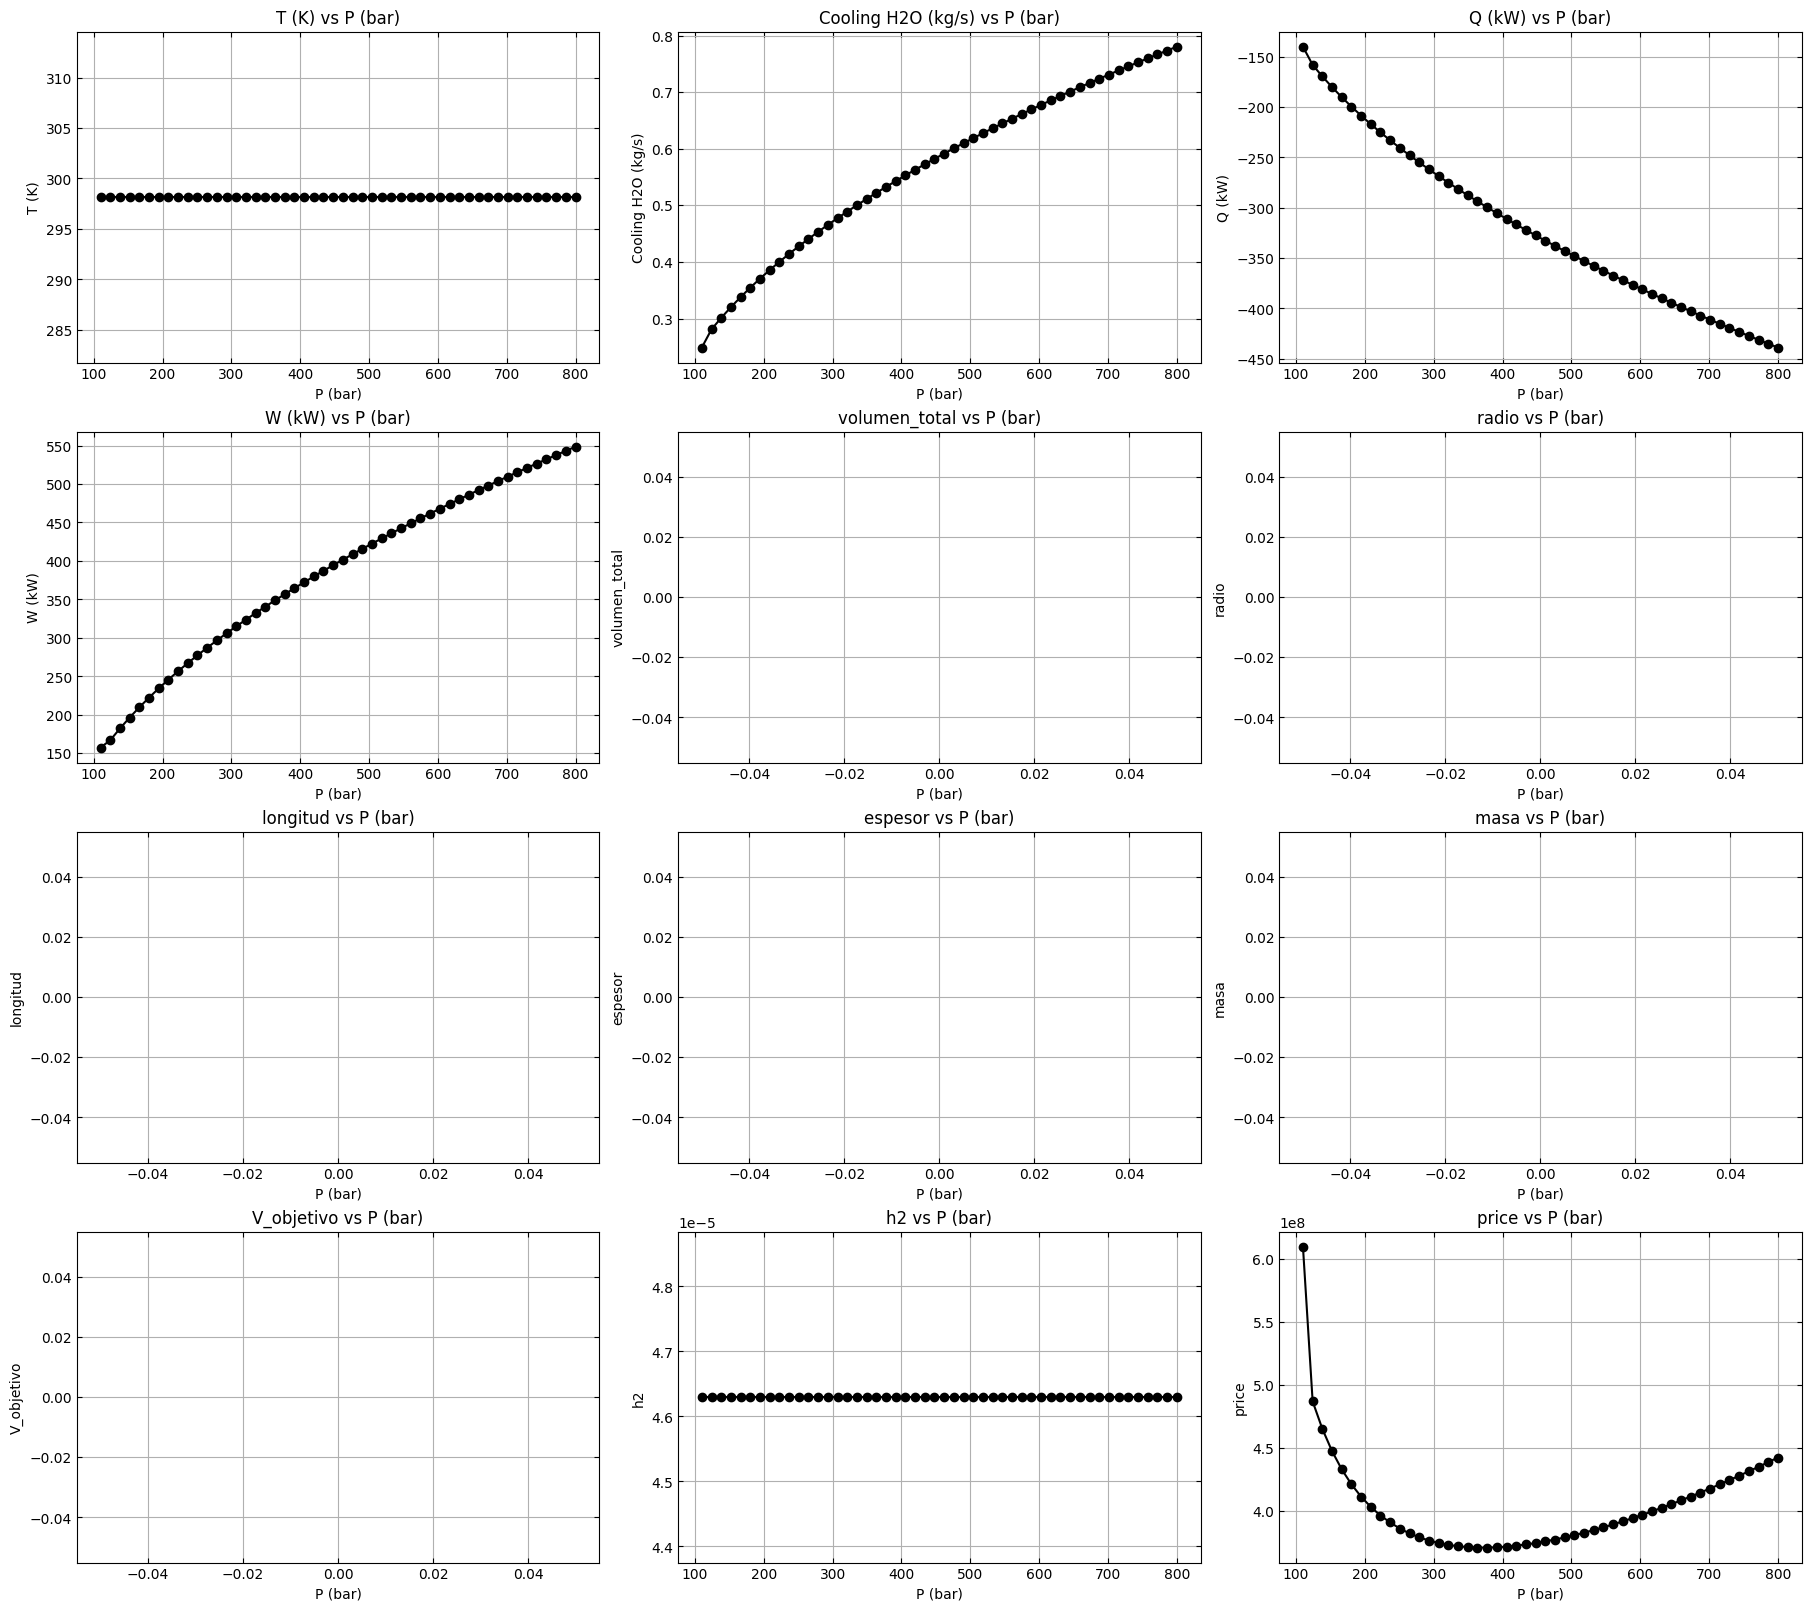

In [10]:
import matplotlib.pyplot as plt
import scienceplots  # Asegúrate de tener instalado: pip install SciencePlots
import math

# Desactivar el uso de LaTeX para evitar el error.
#plt.rcParams['text.usetex'] = False

# Utiliza una combinación de estilos populares para obtener un formato científico
#plt.style.use(['science'])#, 'ieee', 'std-colors'])

# Lista de variables a graficar versus "P (bar)"
variables_to_plot = [
    "T (K)",
    "Cooling H2O (kg/s)",
    "Q (kW)",
    "W (kW)",
    "volumen_total",
    "radio",
    "longitud",
    "espesor",
    "masa",
    "V_objetivo",
    "h2",
    "price"
]

# Se asume que df_resultados ya está definido y contiene la columna "P (bar)" y las demás variables
df_resultados_sorted = df_resultados.sort_values(by="P (bar)")

num_vars = len(variables_to_plot)
cols = 3
rows = math.ceil(num_vars / cols)

fig, axes = plt.subplots(rows, cols, figsize=(6 * cols, 4 * rows), constrained_layout=True)
axes = axes.flatten()

# Graficar cada variable versus "P (bar)"
for i, var in enumerate(variables_to_plot):
    ax = axes[i]
    ax.plot(
        df_resultados_sorted["P (bar)"],
        df_resultados_sorted[var],
        marker="o", linestyle="-", color="black"
    )
    ax.set_xlabel("P (bar)")
    ax.set_ylabel(var)
    ax.set_title(f"{var} vs P (bar)")
    ax.grid(True)
    ax.tick_params(axis="both", which="both", direction="in", top=True, right=True)

# Eliminar axes vacíos en caso de que excedan el total de variables
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.show()


In [11]:
df_resultados[df_resultados['price']==df_resultados['price'].min()]

,T (K),P (bar),Cooling H2O (kg/s),Q (kW),W (kW),volumen_total,radio,longitud,espesor,masa,V_objetivo,h2,price,It. No.
18,298.15,363.469388,0.521942,-293.637727,348.733173,None,None,None,None,None,None,0.000046,3.705703e+08,18


In [14]:
k=compis[df_resultados['It. No.'][6]]
k['Cooling H2O (kg/d)']=(k['Cooling H2O (kg/s)']*86400)/1e3
k

,Compressor,T (K),P (bar),Cooling H2O (kg/s),Q (kW),W (kW),T comp,Purchased Equipment Cost (USD),Cooling H2O (kg/d)
0,No. 1,298.15,85.496599,0.198537,-111.694123,134.537885,342.627896,"$422,720.64",17.153560
1,No. 2,298.15,139.993197,0.099513,-55.984840,60.087758,342.627896,"$195,126.85",8.597940
2,No. 3,298.15,194.489796,0.072371,-40.714848,39.708148,342.627896,"$128,226.99",6.252832
3,Total,298.15,194.489796,0.370421,-208.393811,234.333792,1027.883687,"$746,074.49",32.004332


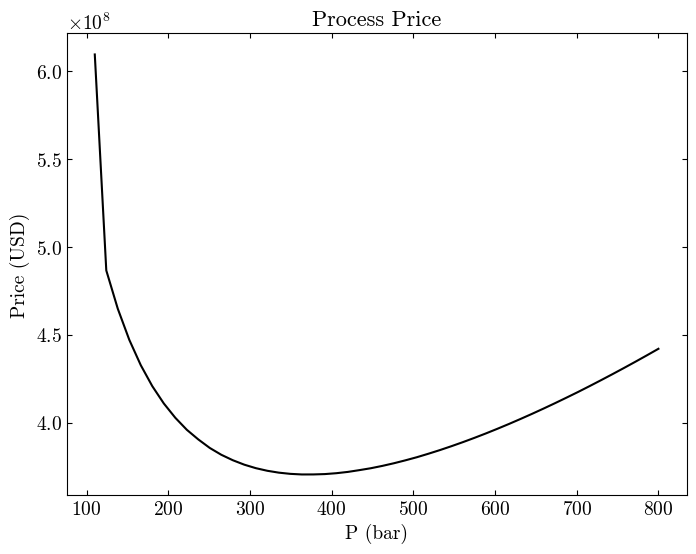

In [ ]:
import matplotlib.pyplot as plt
#import scienceplots  # Asegúrate de tener instalado: pip install SciencePlots

# Opcional: activar un estilo popular (en este ejemplo usamos 'no-latex')
plt.style.use(['no-latex'])

# Se asume que df_resultados ya está definido y contiene las columnas "P (bar)" y "price"
df_resultados_sorted = df_resultados.sort_values(by="P (bar)")

# Crear la figura y el eje
fig, ax = plt.subplots(figsize=(8, 6))

# Graficar 'price' en función de 'P (bar)'
ax.plot(df_resultados_sorted["P (bar)"], df_resultados_sorted["price"],
        linestyle="-", color="black",lw=1.5)

# Personalizar etiquetas y título
ax.set_xlabel("P (bar)", fontsize=14)
ax.set_ylabel("Price (USD)", fontsize=14)
ax.set_title("Process Price", fontsize=16)

# Activar la grilla y ajustar los ticks para un formato profesional

ax.tick_params(axis="both", which="major", labelsize=14, direction="in", top=True, right=True)
ax.tick_params(axis="both", which="minor", labelsize=12, direction="in", top=True, right=True)

# Forzar notación científica (esto hará que se muestre la notación ×10^...)
ax.ticklabel_format(axis="both", style="sci")

# Aumentar el tamaño de la fuente de la notación científica (offset text)
ax.xaxis.get_offset_text().set_fontsize(14)
ax.yaxis.get_offset_text().set_fontsize(14)

plt.show()


In [ ]:
import matplotlib.pyplot as plt

# Imprime todos los estilos disponibles en Matplotlib
print(plt.style.available)


['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'bright', 'cjk-jp-font', 'cjk-kr-font', 'cjk-sc-font', 'cjk-tc-font', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'grid', 'high-contrast', 'high-vis', 'ieee', 'latex-sans', 'light', 'muted', 'nature', 'no-latex', 'notebook', 'petroff10', 'pgf', 'retro', 'russian-font', 'sans', 'scatter', 'science', 'seaborn-v0_8', 'seaborn-v0_8-bright', 'seaborn-v0_8-colorblind', 'seaborn-v0_8-dark', 'seaborn-v0_8-dark-palette', 'seaborn-v0_8-darkgrid', 'seaborn-v0_8-deep', 'seaborn-v0_8-muted', 'seaborn-v0_8-notebook', 'seaborn-v0_8-paper', 'seaborn-v0_8-pastel', 'seaborn-v0_8-poster', 'seaborn-v0_8-talk', 'seaborn-v0_8-ticks', 'seaborn-v0_8-white', 'seaborn-v0_8-whitegrid', 'std-colors', 'tableau-colorblind10', 'turkish-font', 'vibrant']


Parámetros ajustados:
a = 598312476.8693327
n = -0.06571638077638466


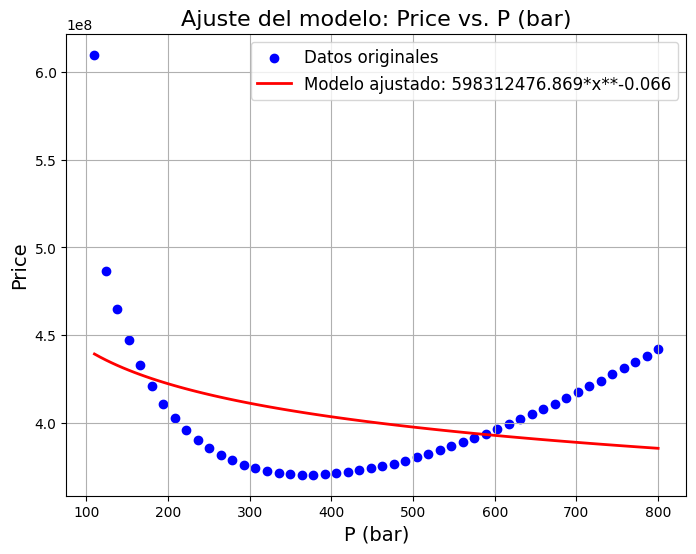

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# Se asume que df_resultados ya está definido y contiene las columnas:
# 'P (bar)' -> variable independiente (x)
# 'price'   -> variable dependiente (y)
#
# Si deseas probar con datos simulados, puedes descomentar el siguiente bloque:
# df_resultados = pd.DataFrame({
#     "P (bar)": np.linspace(10, 100, 20),
#     "price": 2.5 * np.linspace(10, 100, 20)**1.2 + np.random.normal(0, 20, 20)
# })

# Extraer los datos
x = df_resultados['P (bar)'].values
y = df_resultados['price'].values

# Definir el modelo: f(x) = a * x^n
def model_func(x, a, n):
    return a * x**n

# Estimar valores iniciales para los parámetros (p0) es muy importante en la optimización no lineal
p0 = [1.0, 1.0]  # a = 1, n = 1, por ejemplo

# Ajuste del modelo usando curve_fit
# Usamos el método 'trf' para que se puedan pasar parámetros de tolerancia (xtol) y max_nfev
popt, pcov = curve_fit(
    model_func, 
    x, 
    y, 
    p0=p0, 
    method='trf', 
    xtol=1e-3,         # Tolerancia en los cambios en la solución 
    max_nfev=10000      # Número máximo de evaluaciones de la función
)

# Los parámetros optimizados se almacenan en popt
a_fit, n_fit = popt

print("Parámetros ajustados:")
print("a =", a_fit)
print("n =", n_fit)

# Crear puntos para graficar el modelo ajustado en el rango de los datos
x_fit = np.linspace(x.min(), x.max(), 100)
y_fit = model_func(x_fit, a_fit, n_fit)

# Graficar los datos originales y la curva ajustada
plt.figure(figsize=(8, 6))
plt.scatter(x, y, label='Datos originales', color='blue')
plt.plot(x_fit, y_fit, label=f'Modelo ajustado: {a_fit:.3f}*x**{n_fit:.3f}', color='red', linewidth=2)
plt.xlabel("P (bar)", fontsize=14)
plt.ylabel("Price", fontsize=14)
plt.title("Ajuste del modelo: Price vs. P (bar)", fontsize=16)
plt.legend(fontsize=12)
plt.grid(True)
plt.show()


Coeficientes ajustados:
a = 885.3987243373675
b = -826298.0944799372
c = 559878597.2238686


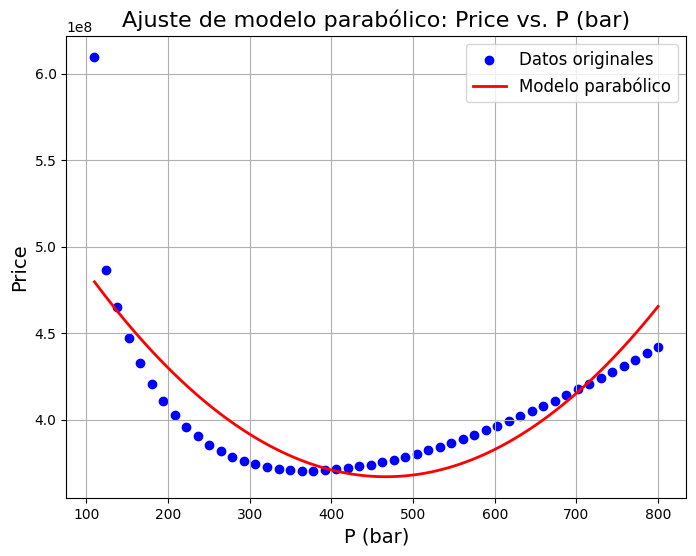

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Supongamos que df_resultados ya está definido y contiene las columnas:
# 'P (bar)' para la presión y 'price' para el costo.
# Ejemplo de datos simulados (comenta o elimina estas líneas al trabajar con tus datos reales)
# df_resultados = pd.DataFrame({
#     "P (bar)": np.linspace(10, 100, 20),
#     "price": 0.05 * np.linspace(10, 100, 20)**2 - 2 * np.linspace(10, 100, 20) + 200 + np.random.normal(0, 20, 20)
# })

# Extraer datos de las columnas de interés
x = df_resultados['P (bar)'].values
y = df_resultados['price'].values

# Ajuste de un polinomio de grado 2 (parábola) a los datos
coeffs = np.polyfit(x, y, 2)  # coeffs = [a, b, c]
fitted_poly = np.poly1d(coeffs)

print("Coeficientes ajustados:")
print("a =", coeffs[0])
print("b =", coeffs[1])
print("c =", coeffs[2])

# Crear puntos para graficar la función ajustada
x_fit = np.linspace(x.min(), x.max(), 100)
y_fit = fitted_poly(x_fit)

# Graficar los datos originales y la curva ajustada
plt.figure(figsize=(8, 6))
plt.scatter(x, y, label='Datos originales', color='blue')
plt.plot(x_fit, y_fit, label='Modelo parabólico', color='red', linewidth=2)
plt.xlabel("P (bar)", fontsize=14)
plt.ylabel("Price", fontsize=14)
plt.title("Ajuste de modelo parabólico: Price vs. P (bar)", fontsize=16)
plt.legend(fontsize=12)
plt.grid(True)
plt.show()


In [ ]:
stages,temperature,Qk,Wk,waterr,price=[],[],[],[],[],[]
for i in range(len(Pes)):
    P=Pes[i]
    Po=31
    P_diff=P-Po
    P1=Po
    P2=P
    N_etapas=np.ceil((np.log(P2)/np.log(P1))/np.log(2))
    stages.append(N_etapas)
    P_etapa=P_diff/N_etapas
    Po=Po
    Pf=P
    P_acum=[Po]
    Temps=[25+273.15]
    Tref=Tref
    m=m
    eta=0.75
    Qs,Ts,m_H2O,comp,power,Ps=[],[],[],[],[],[]
    for i in range(int(N_etapas)):
        P1=sum(P_acum)
        print(P1)
        P_acum.append(P_etapa)
        P2=sum(P_acum)
        #Ti=(sum(P_acum)*V2*2)/(m*Z*8.314)
        #print('T',Ti)
        # Valor inicial para la incógnita x (en este caso, es un vector de una dimensión)
        x0 = [1.0]
        sol = root(trabajo_reversible_IT, x0=500, args=(m, P1, P2, eta,298.15), method='hybr')
        if sol.success:
            print(sol.message)
        else:
            print(sol.message)

        resultado = trabajo_reversible(m, P1, P2, eta, sol.x[0]-273.15,298.15)
        print(f"W: {resultado:.20f} kW")
        # Se utiliza scipy.optimize.root con método 'hybr'
        solucion = root(balance, x0, args=(sol.x[0],Tref, m), method='hybr')

        if solucion.success:
            x_encontrado = solucion.x[0]
            print(f"Solución encontrada: x = {x_encontrado:.6f}")
            Temps.append(25+273.15)
            Qs.append(float(-e))
            Ts.append((25+273.15))
            m_H2O.append(float(x_encontrado))
            comp.append('No. '+str(i+1))
            CP=19.67099783 + 0.069681519*T - 0.000200098*T**2 + 2.89493E-07*T**3 - 2.22475E-10*T**4 + 8.81466E-14*T**5 - 1.42043E-17*T**6
            CP=CP/2*1000
            power.append(resultado*1e3)
            Ps.append(P2)
        else:
            print("No se encontró solución:", solucion.message)
    # Crear un DataFrame con los datos
    data = {
        "Compressor": comp,
        "T (K)": Ts,
        "P (bar)": Ps,  # Convertir de Pa a bar
        "Cooling H2O (kg/s)": m_H2O,
        "Q (kW)": np.array(Qs),
        #"Q (kW) Aspen":np.array([-1645.66707374,-775.158866276,-514.144266522]),
        "W (kW)": np.array(power)
        #"W (kW) Aspen":np.array([2211.5522, 1052.84936, 706.504967])
        
    }

    df_compresores = pd.DataFrame(data)

    #df_compresores['Error %']=abs(((df_compresores['Q (kW) Aspen']-df_compresores['Q (kW) Python'])/df_compresores['Q (kW) Aspen']*100 + (df_compresores['W (kW) Aspen']-df_compresores['W (kW) Python'])/df_compresores['W (kW) Aspen']*100)/2)
    df_compresores.loc[df_compresores.shape[0]] = ["Total", Temps[-1], Ps[-1], sum(df_compresores['Cooling H2O (kg/s)']), sum(df_compresores['Q (kW)']), sum(df_compresores['W (kW)'])]
    calculator = PriceCalculator(df_compresores,N_etapas,CS)
    
    
    temperature.append(df_compresores.loc[df_compresores.shape[0]-1]['T (K)'])
    Qk.append(df_compresores.loc[df_compresores.shape[0]-1]['Q (kW)'])
    Wk.append(df_compresores.loc[df_compresores.shape[0]-1]['W (kW)'])
    waterr.append(df_compresores.loc[df_compresores.shape[0]-1]['Cooling H2O (kg/s)'])
    resultadot = calcular_dimension_tanque(P=df_compresores.loc[df_compresores.shape[0]-1]['P (bar)'], m=10000, crit=crit, tipo='hemi', rho_tank=4500)
    
    calculator1 = TankCostCalculator("Type I", resultadot['masa']*1e3)
    price.append(calculator.final+calculator1.final)
    

31
3100
7050.0 298.15
3100
7050.0
kW 1867.2835333955588
3100
7050.0 298.15
3100
7050.0
kW 1867.2835333955588
3100
7050.0 298.15
3100
7050.0
kW 1867.2835333955588
3100
7050.0 298.15
3100
7050.0
kW 1867.2835483360004
3100
7050.0 298.15
3100
7050.0
kW 1692.125003213775
3100
7050.0 298.15
3100
7050.0
kW 1690.4741173340667
3100
7050.0 298.15
3100
7050.0
kW 1690.4582729397364
3100
7050.0 298.15
3100
7050.0
kW 1690.4582714369349
The solution converged.
W: 0.10434927601462562485 kW
Solución encontrada: x = 0.158417
70.5
7050.0
11000.0 298.15
7050.0
11000.0
kW 1024.654754246111
7050.0
11000.0 298.15
7050.0
11000.0
kW 1024.654754246111
7050.0
11000.0 298.15
7050.0
11000.0
kW 1024.654754246111
7050.0
11000.0 298.15
7050.0
11000.0
kW 1024.654762370594
7050.0
11000.0 298.15
7050.0
11000.0
kW 862.9168037527157
7050.0
11000.0 298.15
7050.0
11000.0
kW 860.9828037583148
7050.0
11000.0 298.15
7050.0
11000.0
kW 860.9569083348937
7050.0
11000.0 298.15
7050.0
11000.0
kW 860.9569032420858
7050.0
11000.0 298

/tmp/ipykernel_6229/1972708371.py:62: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  self.extras_df = self.extras_df.applymap(lambda x: f"${x:,.2f}" if isinstance(x, (int, float)) else x)
/tmp/ipykernel_6229/1702185921.py:160: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  self.extras_df = self.extras_df.applymap(lambda x: f"${x:,.2f}" if isinstance(x, (int, float)) else x)
/tmp/ipykernel_6229/1972708371.py:62: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  self.extras_df = self.extras_df.applymap(lambda x: f"${x:,.2f}" if isinstance(x, (int, float)) else x)
/tmp/ipykernel_6229/1702185921.py:160: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  self.extras_df = self.extras_df.applymap(lambda x: f"${x:,.2f}" if isinstance(x, (int, float)) else x)
/tmp/ipykernel_6229/1972708371.py:62: FutureWarning: DataFrame.applymap has been deprecated. Use D

  Compressor   T (K)     P (bar)  Cooling H2O (kg/s)      Q (kW)      W (kW)  \
0      No. 1  298.15  132.435374            0.302648 -170.265710  213.182863   
1      No. 2  298.15  233.870748            0.116297  -65.427275   72.694013   
2      No. 3  298.15  335.306122            0.081222  -45.694714   46.353564   
3      Total  298.15  335.306122            0.500167 -281.387699  332.230440   

  Purchased Equipment Cost (USD)  
0                    $640,458.65  
1                    $235,459.71  
2                    $150,268.86  
3                  $1,026,187.22  
Volumen calculado del tanque: 614.78 m³
Radio del tanque: 3.89 m
Longitud del tanque: 15.55 m
Espesor del tanque: 947.39 mm
Masa del tanque: 4498.18 ton
kk 0    $367,544,208.32
Name: Final Cost (USD), dtype: object
31
3100
13712.92517006803 298.15
3100
13712.92517006803
kW 3416.8009736133245
3100
13712.92517006803 298.15
3100
13712.92517006803
kW 3416.8009736133245
3100
13712.92517006803 298.15
3100
13712.92517006803
kW 

/tmp/ipykernel_6229/1972708371.py:62: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  self.extras_df = self.extras_df.applymap(lambda x: f"${x:,.2f}" if isinstance(x, (int, float)) else x)
/tmp/ipykernel_6229/1702185921.py:160: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  self.extras_df = self.extras_df.applymap(lambda x: f"${x:,.2f}" if isinstance(x, (int, float)) else x)
/tmp/ipykernel_6229/1972708371.py:62: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  self.extras_df = self.extras_df.applymap(lambda x: f"${x:,.2f}" if isinstance(x, (int, float)) else x)
/tmp/ipykernel_6229/1702185921.py:160: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  self.extras_df = self.extras_df.applymap(lambda x: f"${x:,.2f}" if isinstance(x, (int, float)) else x)
/tmp/ipykernel_6229/1972708371.py:62: FutureWarning: DataFrame.applymap has been deprecated. Use D

  Compressor   T (K)     P (bar)  Cooling H2O (kg/s)      Q (kW)      W (kW)  \
0      No. 1  298.15  245.088435            0.484302 -272.462065  353.074158   
1      No. 2  298.15  459.176871            0.136792  -76.957316   88.092883   
2      No. 3  298.15  673.265306            0.095103  -53.503598   56.775721   
3      Total  298.15  673.265306            0.716197 -402.922979  497.942763   

  Purchased Equipment Cost (USD)  
0                    $988,177.36  
1                    $283,669.09  
2                    $184,396.90  
3                  $1,456,243.35  
Volumen calculado del tanque: 369.48 m³
Radio del tanque: 3.28 m
Longitud del tanque: 13.12 m
Espesor del tanque: 1605.32 mm
Masa del tanque: 4961.1 ton
kk 0    $405,369,049.98
Name: Final Cost (USD), dtype: object
31
3100
24978.231292517004 298.15
3100
24978.231292517004
kW 4887.980513753169
3100
24978.231292517004 298.15
3100
24978.231292517004
kW 4887.980513753169
3100
24978.231292517004 298.15
3100
24978.231292517004

/tmp/ipykernel_6229/1972708371.py:62: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  self.extras_df = self.extras_df.applymap(lambda x: f"${x:,.2f}" if isinstance(x, (int, float)) else x)
/tmp/ipykernel_6229/1702185921.py:160: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  self.extras_df = self.extras_df.applymap(lambda x: f"${x:,.2f}" if isinstance(x, (int, float)) else x)
/tmp/ipykernel_6229/1972708371.py:62: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  self.extras_df = self.extras_df.applymap(lambda x: f"${x:,.2f}" if isinstance(x, (int, float)) else x)
/tmp/ipykernel_6229/1702185921.py:160: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  self.extras_df = self.extras_df.applymap(lambda x: f"${x:,.2f}" if isinstance(x, (int, float)) else x)
/tmp/ipykernel_6229/1972708371.py:62: FutureWarning: DataFrame.applymap has been deprecated. Use D

In [ ]:
resultados=pd.DataFrame()
resultados['P (bar)']=Pes
resultados['Stages']=stages
resultados['Q (kW)']=Qk
resultados['W (kW)']=Wk
resultados['H2O (kg/s)']=waterr
resultados['Price (USD)']=price

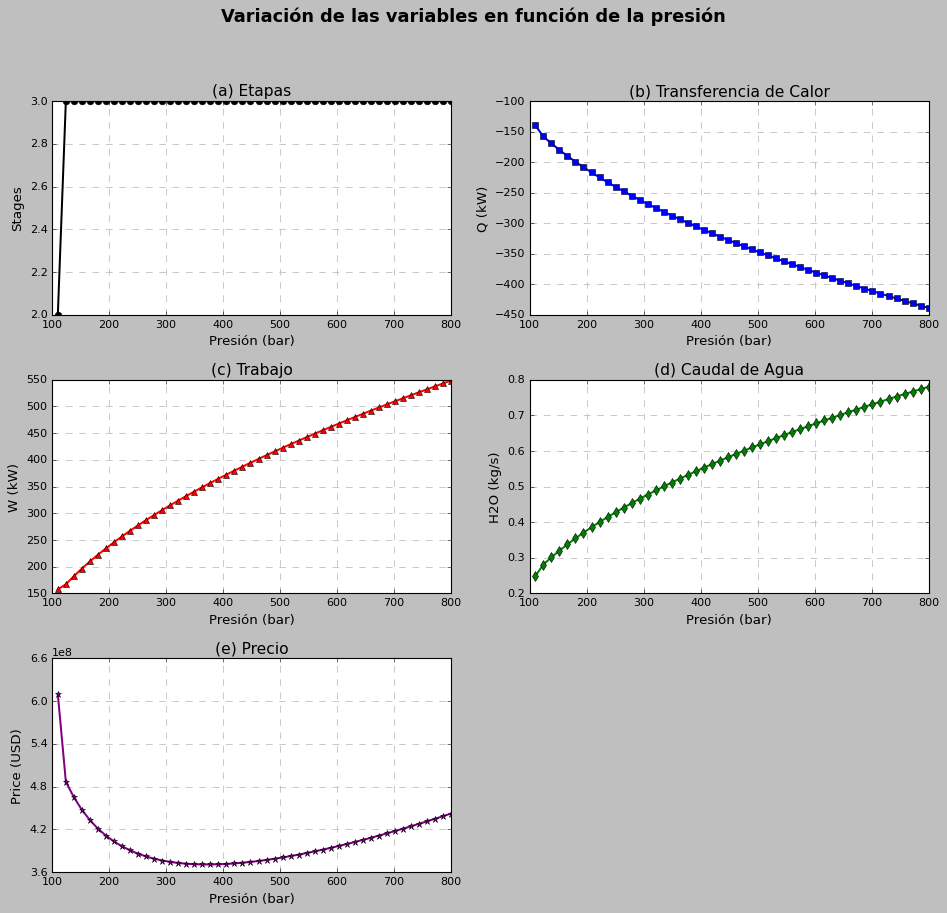

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.ticker as ticker  # Para controlar la cantidad de ticks en el eje y

# Aplicamos el estilo clásico y actualizamos algunos parámetros estéticos
plt.style.use('classic')
plt.rcParams.update({
    'font.size': 12,             # Tamaño global de fuente
    'axes.labelsize': 12,        # Tamaño de las etiquetas de los ejes
    'axes.titlesize': 14,        # Tamaño de los títulos de los ejes
    'xtick.labelsize': 10,       # Tamaño de las etiquetas del eje x
    'ytick.labelsize': 10,       # Tamaño de las etiquetas del eje y
    'lines.linewidth': 1.8,      # Grosor de las líneas
    'lines.markersize': 6,       # Tamaño de los marcadores
    'grid.linestyle': '--',      # Estilo discontínuo para la rejilla
    'grid.linewidth': 0.75,      # Grosor de la rejilla
    'grid.color': '0.75',        # Color gris para la rejilla
})

# Se asume que las variables Pes, stages, Qk, Wk, waterr y price ya están definidas
resultados = pd.DataFrame({
    'P (bar)': Pes,
    'Stages': stages,
    'Q (kW)': Qk,
    'W (kW)': Wk,
    'H2O (kg/s)': waterr,
    'Price (USD)': price
})

# Configuración de la figura con 3 filas y 2 columnas (sin sharex para mostrar todos los valores en X)
fig, axs = plt.subplots(3, 2, figsize=(12, 12))
fig.suptitle('Variación de las variables en función de la presión', fontsize=16, fontweight='bold')

# Panel (a): Stages vs. Presión
axs[0, 0].plot(resultados['P (bar)'], resultados['Stages'],
               marker='o', linestyle='-', color='black')
axs[0, 0].set_ylabel('Stages')
axs[0, 0].set_title('(a) Etapas')
axs[0, 0].grid(True)
axs[0, 0].set_axisbelow(True)
axs[0, 0].set_xlabel('Presión (bar)')  # Se muestran los valores del eje de la presión

# Panel (b): Q (kW) vs. Presión
axs[0, 1].plot(resultados['P (bar)'], resultados['Q (kW)'],
               marker='s', linestyle='-', color='blue')
axs[0, 1].set_ylabel('Q (kW)')
axs[0, 1].set_title('(b) Transferencia de Calor')
axs[0, 1].grid(True)
axs[0, 1].set_axisbelow(True)
axs[0, 1].set_xlabel('Presión (bar)')

# Panel (c): W (kW) vs. Presión
axs[1, 0].plot(resultados['P (bar)'], resultados['W (kW)'],
               marker='^', linestyle='-', color='red')
axs[1, 0].set_ylabel('W (kW)')
axs[1, 0].set_title('(c) Trabajo')
axs[1, 0].grid(True)
axs[1, 0].set_axisbelow(True)
axs[1, 0].set_xlabel('Presión (bar)')

# Panel (d): H2O (kg/s) vs. Presión
axs[1, 1].plot(resultados['P (bar)'], resultados['H2O (kg/s)'],
               marker='d', linestyle='-', color='green')
axs[1, 1].set_ylabel('H2O (kg/s)')
axs[1, 1].set_title('(d) Caudal de Agua')
axs[1, 1].grid(True)
axs[1, 1].set_axisbelow(True)
axs[1, 1].set_xlabel('Presión (bar)')

# Panel (e): Price (USD) vs. Presión
axs[2, 0].plot(resultados['P (bar)'], resultados['Price (USD)'],
               marker='*', linestyle='-', color='purple')
axs[2, 0].set_ylabel('Price (USD)')
axs[2, 0].set_title('(e) Precio')
axs[2, 0].grid(True)
axs[2, 0].set_axisbelow(True)
axs[2, 0].set_xlabel('Presión (bar)')
# Reducir el número de ticks en el eje y a un máximo de 5 para el gráfico de Price
axs[2, 0].yaxis.set_major_locator(ticker.MaxNLocator(5))

# Ocultamos el panel vacío (última celda de la cuadrícula)
axs[2, 1].axis('off')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


In [ ]:


P=172
Po=31
P_diff=P-Po
P1=Po
P2=P
N_etapas=np.ceil((np.log(P2)/np.log(P1))/np.log(2))
N_etapas
P_etapa=P_diff/N_etapas
Po=Po
Pf=P
P_acum=[Po]
Temps=[25+273.15]
Tref=Tref
m=m
eta=0.75
Qs,Ts,m_H2O,comp,power,Ps=[],[],[],[],[],[]
for i in range(int(N_etapas)):
    P1=sum(P_acum)
    print(P1)
    P_acum.append(P_etapa)
    P2=sum(P_acum)
    #Ti=(sum(P_acum)*V2*2)/(m*Z*8.314)
    #print('T',Ti)
    # Valor inicial para la incógnita x (en este caso, es un vector de una dimensión)
    x0 = [1.0]
    sol = root(trabajo_reversible_IT, x0=500, args=(m, P1, P2, eta,298.15), method='hybr')
    if sol.success:
        print(sol.message)
    else:
        print(sol.message)

    resultado = trabajo_reversible(m, P1, P2, eta, sol.x[0]-273.15,298.15)
    print(f"W: {resultado:.20f} kW")
    # Se utiliza scipy.optimize.root con método 'hybr'
    solucion = root(balance, x0, args=(sol.x[0],Tref, m), method='hybr')

    if solucion.success:
        x_encontrado = solucion.x[0]
        print(f"Solución encontrada: x = {x_encontrado:.6f}")
        Temps.append(25+273.15)
        Qs.append(float(-e))
        Ts.append((25+273.15))
        m_H2O.append(float(x_encontrado))
        comp.append('No. '+str(i+1))
        CP=19.67099783 + 0.069681519*T - 0.000200098*T**2 + 2.89493E-07*T**3 - 2.22475E-10*T**4 + 8.81466E-14*T**5 - 1.42043E-17*T**6
        CP=CP/2*1000
        power.append(resultado*1e3)
        Ps.append(P2)
    else:
        print("No se encontró solución:", solucion.message)
# Crear un DataFrame con los datos
data = {
	"Compressor": comp,
    "T (K)": Ts,
    "P (bar)": Ps,  # Convertir de Pa a bar
	"Cooling H2O (kg/s)": m_H2O,
	"Q (kW)": np.array(Qs),
    #"Q (kW) Aspen":np.array([-1645.66707374,-775.158866276,-514.144266522]),
    "W (kW)": np.array(power)
    #"W (kW) Aspen":np.array([2211.5522, 1052.84936, 706.504967])
    
}

df_compresores = pd.DataFrame(data)

#df_compresores['Error %']=abs(((df_compresores['Q (kW) Aspen']-df_compresores['Q (kW) Python'])/df_compresores['Q (kW) Aspen']*100 + (df_compresores['W (kW) Aspen']-df_compresores['W (kW) Python'])/df_compresores['W (kW) Aspen']*100)/2)
df_compresores.loc[df_compresores.shape[0]] = ["Total", Temps[-1], Ps[-1], sum(df_compresores['Cooling H2O (kg/s)']), sum(df_compresores['Q (kW)']), sum(df_compresores['W (kW)'])]
df_compresores


31
3100
7800.0 298.15
3100
7800.0
kW 2099.6081213396997
3100
7800.0 298.15
3100
7800.0
kW 2099.6081213396997
3100
7800.0 298.15
3100
7800.0
kW 2099.6081213396997
3100
7800.0 298.15
3100
7800.0
kW 2099.6081381186063
3100
7800.0 298.15
3100
7800.0
kW 1943.0449633545518
3100
7800.0 298.15
3100
7800.0
kW 1941.7791147680246
3100
7800.0 298.15
3100
7800.0
kW 1941.7688353379679
3100
7800.0 298.15
3100
7800.0
kW 1941.768834650278
The solution converged.
W: 0.11986227374384432476 kW
Solución encontrada: x = 0.179040
78.0
7800.0
12500.0 298.15
7800.0
12500.0
kW 1090.4662603714667
7800.0
12500.0 298.15
7800.0
12500.0
kW 1090.4662603714667
7800.0
12500.0 298.15
7800.0
12500.0
kW 1090.4662603714667
7800.0
12500.0 298.15
7800.0
12500.0
kW 1090.4662689896174
7800.0
12500.0 298.15
7800.0
12500.0
kW 924.2422462538713
7800.0
12500.0 298.15
7800.0
12500.0
kW 922.2707260516489
7800.0
12500.0 298.15
7800.0
12500.0
kW 922.2448043895358
7800.0
12500.0 298.15
7800.0
12500.0
kW 922.2447994955525
7800.0
12500.0

,Compressor,T (K),P (bar),Cooling H2O (kg/s),Q (kW),W (kW)
0,No. 1,298.15,78.0,0.179040,-100.725834,119.862274
1,No. 2,298.15,125.0,0.095306,-53.618201,56.928691
2,No. 3,298.15,172.0,0.070279,-39.537813,38.137548
3,Total,298.15,172.0,0.344625,-193.881848,214.928513


In [ ]:

calculator = PriceCalculator(df_compresores,N_etapas,CS)

/tmp/ipykernel_6229/1972708371.py:62: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  self.extras_df = self.extras_df.applymap(lambda x: f"${x:,.2f}" if isinstance(x, (int, float)) else x)


In [ ]:
calculator.dataframe

,Compressor,T (K),P (bar),Cooling H2O (kg/s),Q (kW),W (kW),Purchased Equipment Cost (USD)
0,No. 1,298.15,78.0,0.179040,-100.725834,119.862274,"$379,742.01"
1,No. 2,298.15,125.0,0.095306,-53.618201,56.928691,"$184,893.71"
2,No. 3,298.15,172.0,0.070279,-39.537813,38.137548,"$122,987.33"
3,Total,298.15,172.0,0.344625,-193.881848,214.928513,"$687,623.05"


In [ ]:
Tref

283.15

In [ ]:
import numpy as np
import pandas as pd
from scipy.optimize import root, minimize

def normalize_price(price):
    """
    Convierte un valor de precio que puede venir formateado (por ejemplo, "$1,234.56")
    a un número tipo float.
    Si 'price' es un pandas.Series con un solo valor, se extrae ese valor.
    """
    # Si es una serie (con un solo valor), extraer el valor.
    if isinstance(price, pd.Series):
        price = price.iloc[0]
    
    # Si ya es numérico, lo retorna en forma float.
    if isinstance(price, (int, float)):
        return float(price)
    
    if isinstance(price, str):
        # Eliminar símbolos comunes: $, €, espacios y comas
        cleaned = price.replace("$", "").replace("€", "").replace(",", "").strip()
        try:
            return float(cleaned)
        except Exception as ex:
            raise ValueError("No se pudo normalizar el precio: '{}'".format(price))
    # De lo contrario, se intenta convertir a float
    return float(price)

def cost_function(P, m, Tref, T, CS, crit):
    """
    Función objetivo para minimizar; dada una presión P (en bar) calcula el costo total,
    el cual es la suma de:
      - El costo de compresión obtenido con PriceCalculator.
      - El costo del tanque obtenido con TankCostCalculator.
    
    Se normalizan los precios para asegurar que sean float antes de realizar la suma.

    Parámetros:
      - P   : Presión final (en bar). Es la variable independiente a optimizar.
      - m   : Parámetro relacionado a la masa o cantidad a comprimir.
      - Tref: Temperatura de referencia (en Kelvin).
      - T   : Temperatura usada en algunos cálculos (ej. en la ecuación de Cp).
      - CS  : Constante o parámetro requerido por PriceCalculator.
      - crit: Diccionario con las propiedades críticas (keys: 'Tc', 'Pc', 'PM', 'w').
    
    Devuelve:
      total_cost: Suma de los costos (float) de compresión y de tanque.
    """

    # Fijamos la presión de entrada (Po) a 31 bar.
    Po = 31  
    P=P[0]
    if P <= Po:
        # Penalizar fuertemente si la presión final no supera la de entrada.
        return 1e12

    P_diff = P - Po
    P1 = Po
    P2 = P
    # Estimación del número de etapas. Se redondea hacia arriba.
    N_etapas = np.ceil((np.log(P2) / np.log(P1)) / np.log(2))
    # Incremento de presión por etapa:
    P_etapa = P_diff / N_etapas

    # Variables iniciales para las etapas
    P_acum = [Po]            # Acumulador de presión
    Temps = [25 + 273.15]    # Temperatura en Kelvin (25°C + 273.15)
    eta = 0.75               # Eficiencia
    # Inicializar listas para los resultados de cada etapa
    Qs, Ts, m_H2O, comp, power, Ps_list = [], [], [], [], [], []
    
    # Bucle sobre las etapas de compresión:
    for j in range(int(N_etapas)):
        # La presión de entrada actual es la suma de los incrementos acumulados.
        P1_current = sum(P_acum)
        # Agregar la presión de la etapa y actualizar la presión de salida.
        P_acum.append(P_etapa)
        P2_current = sum(P_acum)
        
        # Resolver la ecuación de trabajo reversible (usando una función externa)
        sol = root(trabajo_reversible_IT, x0=500, args=(m, P1_current, P2_current, eta, 298.15), method='hybr')
        if not sol.success:
            return 1e12  # Penalización si no se converge

        # Calcular el trabajo (en kW) usando la función trabajo_reversible.
        # Se utiliza sol.x[0] - 273.15 para convertir de Kelvin a °C.
        resultado = trabajo_reversible(m, P1_current, P2_current, eta, sol.x[0] - 273.15, 298.15)
        
        # Resolver la ecuación de balance (por ejemplo, para obtener el caudal de enfriamiento),
        # usando root con un valor inicial.
        x0_vec = [1.0]
        solucion = root(balance, x0_vec, args=(sol.x[0], Tref, m), method='hybr')
        if not solucion.success:
            return 1e12
        x_encontrado = solucion.x[0]
        
        # Se asume un valor placeholder para "e" (ya que no está definido, se utiliza 0)
        e_value = 0  
        
        # Acumulación de datos para la etapa.
        Temps.append(25 + 273.15)
        Qs.append(float(-e_value))  # Aquí se debe introducir el valor correcto para Q.
        Ts.append(25 + 273.15)
        m_H2O.append(float(x_encontrado))
        comp.append('No. ' + str(j + 1))
        # Se calcula CP con una expresión polinómica (ejemplo, sin utilizarlo directamente)
        CP = (19.67099783 
              + 0.069681519 * T 
              - 0.000200098 * T**2 
              + 2.89493E-07 * T**3 
              - 2.22475E-10 * T**4 
              + 8.81466E-14 * T**5 
              - 1.42043E-17 * T**6)
        CP = CP / 2 * 1000
        
        power.append(resultado * 1e3)  # Convertir a Watts, por ejemplo.
        Ps_list.append(P2_current)
    
    # Armado del DataFrame con información de cada etapa.
    data = {
        "Compressor": comp,
        "T (K)": Ts,
        "P (bar)": Ps_list,  # Se trabaja con P en bar
        "Cooling H2O (kg/s)": m_H2O,
        "Q (kW)": np.array(Qs),
        "W (kW)": np.array(power)
    }
    df_compresores = pd.DataFrame(data)
    # Agregar una fila "Total" que resume los valores.
    total_row = ["Total",
                 Temps[-1],
                 Ps_list[-1],
                 df_compresores["Cooling H2O (kg/s)"].sum(),
                 df_compresores["Q (kW)"].sum(),
                 df_compresores["W (kW)"].sum()]
    df_compresores.loc[df_compresores.shape[0]] = total_row

    # --- Cálculo de costos ---
    # Se obtiene el costo del proceso de compresión.
    calculator = PriceCalculator(df_compresores, N_etapas, CS)
    cost_compression = normalize_price(calculator.final)

    # Se dimensiona el tanque utilizando la función calcular_dimension_tanque.
    resultadot = calcular_dimension_tanque(
        P=sum(Ps_list),
        m=10000,
        crit=crit,
        tipo='hemi',
        rho_tank=4500
    )
    # Se calcula el costo del tanque.
    calculator1 = TankCostCalculator("Type I", resultadot["masa"] * 1e3)
    cost_tank = normalize_price(calculator1.extras_df["Final Cost (USD)"])

    # Sumar ambos costos para obtener el costo total.
    total_cost = cost_compression + cost_tank
    print
    print('TOTAL:',total_cost)
    return total_cost

# --- Ejemplo de optimización usando scipy.minimize ---
if __name__ == '__main__':
    # Parámetros o variables del proceso (se deben definir según tu aplicación)
    m = 4/86400           # Ejemplo: masa o caudal relacionado
    Tref = Tref      # Temperatura de referencia en Kelvin
    T = 298.15         # Temperatura usada para ciertos cálculos (como CP)
    CS = "Carbon Steel"           # Constante para PriceCalculator (ejemplo)
    crit = crit
    
    # Definir límites para la presión óptima (en bar). Po es 31 en el código, así que se debe estar por encima.
    P_min = 50  
    P_max = 1000
    x0 = [900]  # Valor inicial en bar
    
    # Ejecutar la optimización
    res = minimize(cost_function, x0, args=(m, Tref, T, CS, crit),
                   bounds=[(P_min, P_max)])
    
    if res.success:
        print("Presión óptima encontrada (bar):", res.x[0])
        print("Costo total mínimo:", res.fun)
    else:
        print("La optimización falló:", res.message)


3100
32066.666666666668 298.15
3100
32066.666666666668
kW 5541.063399431749
3100
32066.666666666668 298.15
3100
32066.666666666668
kW 5541.063399431749
3100
32066.666666666668 298.15
3100
32066.666666666668
kW 5541.063399431749
3100
32066.666666666668 298.15
3100
32066.666666666668
kW 5541.0634414469505
3100
32066.666666666668 298.15
3100
32066.666666666668
kW 7032.575719247068
3100
32066.666666666668 298.15
3100
32066.666666666668
kW 6900.452524637113
3100
32066.666666666668 298.15
3100
32066.666666666668
kW 6914.935346060866
3100
32066.666666666668 298.15
3100
32066.666666666668
kW 6915.153880983119
3100
32066.666666666668 298.15
3100
32066.666666666668
kW 6915.153488377773
3100
32066.666666666668 298.15
3100
32066.666666666668
kW 6915.153488388297
32066.666666666668
61033.333333333336 298.15
32066.666666666668
61033.333333333336
kW 1703.815957234465
32066.666666666668
61033.333333333336 298.15
32066.666666666668
61033.333333333336
kW 1703.815957234465
32066.666666666668
61033.333333

/tmp/ipykernel_6229/1972708371.py:62: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  self.extras_df = self.extras_df.applymap(lambda x: f"${x:,.2f}" if isinstance(x, (int, float)) else x)
/tmp/ipykernel_6229/1702185921.py:160: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  self.extras_df = self.extras_df.applymap(lambda x: f"${x:,.2f}" if isinstance(x, (int, float)) else x)
/tmp/ipykernel_6229/1972708371.py:62: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  self.extras_df = self.extras_df.applymap(lambda x: f"${x:,.2f}" if isinstance(x, (int, float)) else x)
/tmp/ipykernel_6229/1702185921.py:160: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  self.extras_df = self.extras_df.applymap(lambda x: f"${x:,.2f}" if isinstance(x, (int, float)) else x)
/tmp/ipykernel_6229/1972708371.py:62: FutureWarning: DataFrame.applymap has been deprecated. Use D

3100
32382.34018625364 298.15
3100
32382.34018625364
kW 5567.362290447411
3100
32382.34018625364 298.15
3100
32382.34018625364
kW 5567.362290447411
3100
32382.34018625364 298.15
3100
32382.34018625364
kW 5567.362290447411
3100
32382.34018625364 298.15
3100
32382.34018625364
kW 5567.362332628659
3100
32382.34018625364 298.15
3100
32382.34018625364
kW 7082.632497113273
3100
32382.34018625364 298.15
3100
32382.34018625364
kW 6945.654771317208
3100
32382.34018625364 298.15
3100
32382.34018625364
kW 6960.985015404022
3100
32382.34018625364 298.15
3100
32382.34018625364
kW 6961.227125958155
3100
32382.34018625364 298.15
3100
32382.34018625364
kW 6961.226660334653
3100
32382.34018625364 298.15
3100
32382.34018625364
kW 6961.226660348635
32382.34018625364
61664.68037250728 298.15
32382.34018625364
61664.68037250728
kW 1708.174603314274
32382.34018625364
61664.68037250728 298.15
32382.34018625364
61664.68037250728
kW 1708.174603314274
32382.34018625364
61664.68037250728 298.15
32382.34018625364

/tmp/ipykernel_6229/1972708371.py:62: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  self.extras_df = self.extras_df.applymap(lambda x: f"${x:,.2f}" if isinstance(x, (int, float)) else x)
/tmp/ipykernel_6229/1702185921.py:160: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  self.extras_df = self.extras_df.applymap(lambda x: f"${x:,.2f}" if isinstance(x, (int, float)) else x)
/tmp/ipykernel_6229/1972708371.py:62: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  self.extras_df = self.extras_df.applymap(lambda x: f"${x:,.2f}" if isinstance(x, (int, float)) else x)
/tmp/ipykernel_6229/1702185921.py:160: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  self.extras_df = self.extras_df.applymap(lambda x: f"${x:,.2f}" if isinstance(x, (int, float)) else x)
/tmp/ipykernel_6229/1972708371.py:62: FutureWarning: DataFrame.applymap has been deprecated. Use D